In [20]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [22]:
from pandas.io.data import DataReader

In [23]:
from datetime import datetime

In [24]:
tech_list=["AAPL","GOOG","MSFT","AMZN"]

In [25]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [26]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,"yahoo",start,end)

In [34]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,124.820000,125.120003,123.099998,124.250000,40621400,121.988660
2015-04-02,125.029999,125.559998,124.190002,125.320000,32220100,123.039186
2015-04-06,124.470001,127.510002,124.330002,127.349998,37194000,125.032239
2015-04-07,127.639999,128.119995,125.980003,126.010002,35012300,123.716630
2015-04-08,125.849998,126.400002,124.970001,125.599998,37329200,123.314088


In [35]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-04-01 to 2016-03-31
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


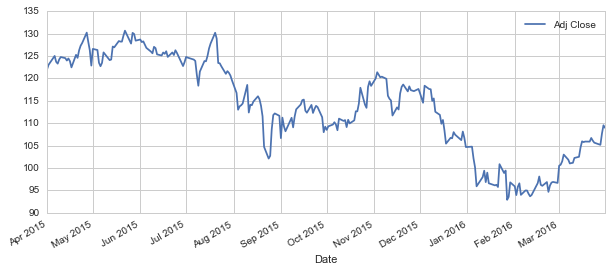

In [33]:
AAPL["Adj Close"].plot(legend=True,figsize=(10,4))

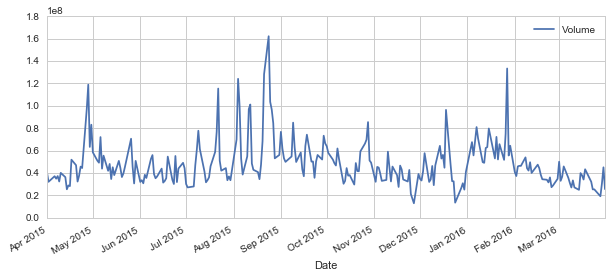

In [36]:
AAPL["Volume"].plot(legend=True,figsize=(10,4))

In [37]:
ma_day=[10,20,50]

In [46]:
for ma in ma_day:
    column_name="MA for %s days"%(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL["Adj Close"],ma)

c:\python3.5\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
c:\python3.5\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  app.launch_new_instance()
c:\python3.5\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()
  app.launch_new_instance()


In [47]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2015-04-01,124.820000,125.120003,123.099998,124.250000,40621400,121.988660,NaN,NaN,NaN
2015-04-02,125.029999,125.559998,124.190002,125.320000,32220100,123.039186,NaN,NaN,NaN
2015-04-06,124.470001,127.510002,124.330002,127.349998,37194000,125.032239,NaN,NaN,NaN
2015-04-07,127.639999,128.119995,125.980003,126.010002,35012300,123.716630,NaN,NaN,NaN
2015-04-08,125.849998,126.400002,124.970001,125.599998,37329200,123.314088,NaN,NaN,NaN


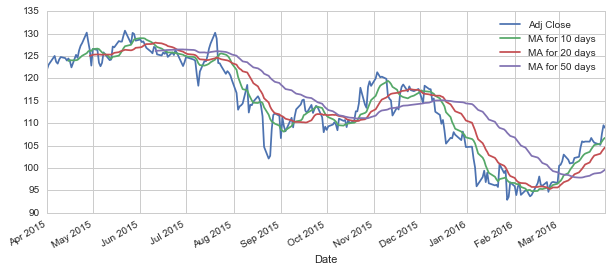

In [48]:
AAPL[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(subplots=False,figsize=(10,4))

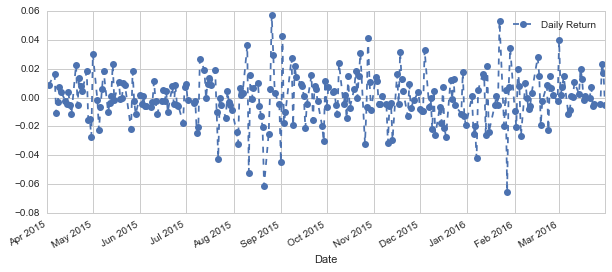

In [52]:
AAPL["Daily Return"]=AAPL["Adj Close"].pct_change()

AAPL["Daily Return"].plot(figsize=(10,4),legend=True,linestyle="--",marker="o")

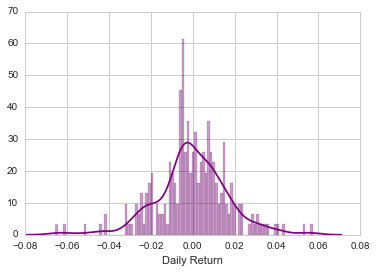

In [54]:
sns.distplot(AAPL["Daily Return"].dropna(),bins=100,color="purple")

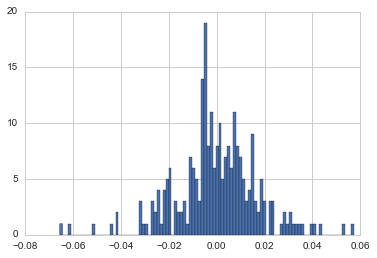

In [56]:
AAPL["Daily Return"].hist(bins=100)

In [60]:
closing_df=DataReader(tech_list,"yahoo",start,end,)["Adj Close"]

In [61]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-01,121.988660,370.260010,542.562439,39.638339
2015-04-02,123.039186,372.250000,535.532417,39.219761
2015-04-06,125.032239,377.040009,536.767432,40.446290
2015-04-07,123.716630,374.410004,537.022404,40.426821
2015-04-08,123.314088,381.200012,541.612446,40.319742


In [62]:
tech_rets=clsoing_df.pct_change()

In [63]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-01,NaN,NaN,NaN,NaN
2015-04-02,0.008612,0.005375,-0.012957,-0.010560
2015-04-06,0.016199,0.012868,0.002306,0.031273
2015-04-07,-0.010522,-0.006975,0.000475,-0.000481
2015-04-08,-0.003254,0.018135,0.008547,-0.002649


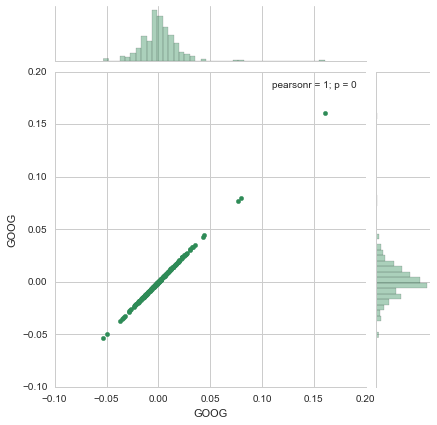

In [66]:
#comparing google for it self
sns.jointplot("GOOG","GOOG",tech_rets,kind="scatter",color="seagreen")

We can see that the relationship is perfectly liner. This makes sense that we compared stock return of Google to itself

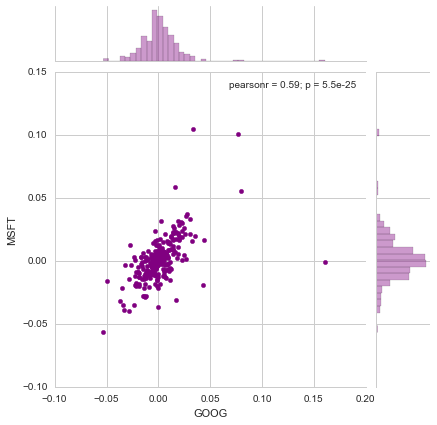

In [72]:
sns.jointplot("GOOG","MSFT",data=tech_rets,kind="scatter",color="purple")

In [73]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-01,NaN,NaN,NaN,NaN
2015-04-02,0.008612,0.005375,-0.012957,-0.010560
2015-04-06,0.016199,0.012868,0.002306,0.031273
2015-04-07,-0.010522,-0.006975,0.000475,-0.000481
2015-04-08,-0.003254,0.018135,0.008547,-0.002649


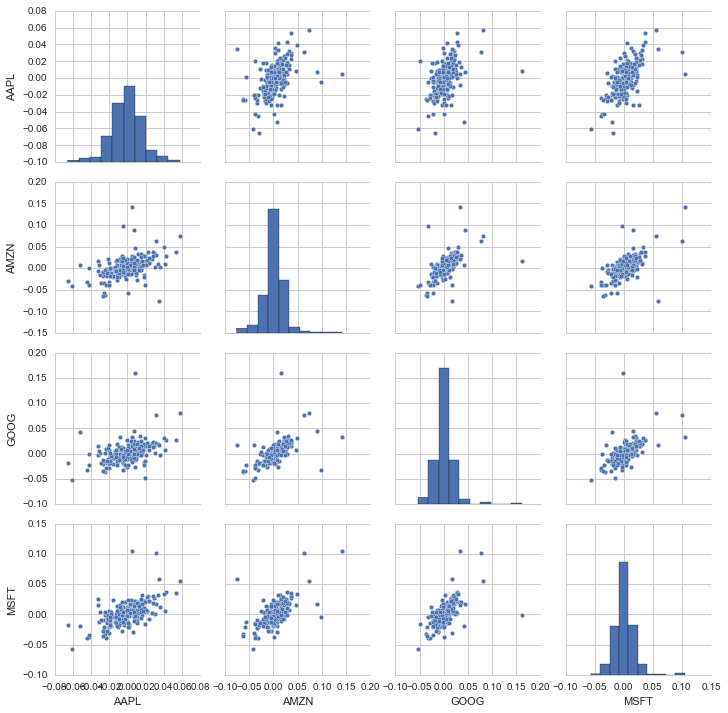

In [74]:
sns.pairplot(tech_rets.dropna())

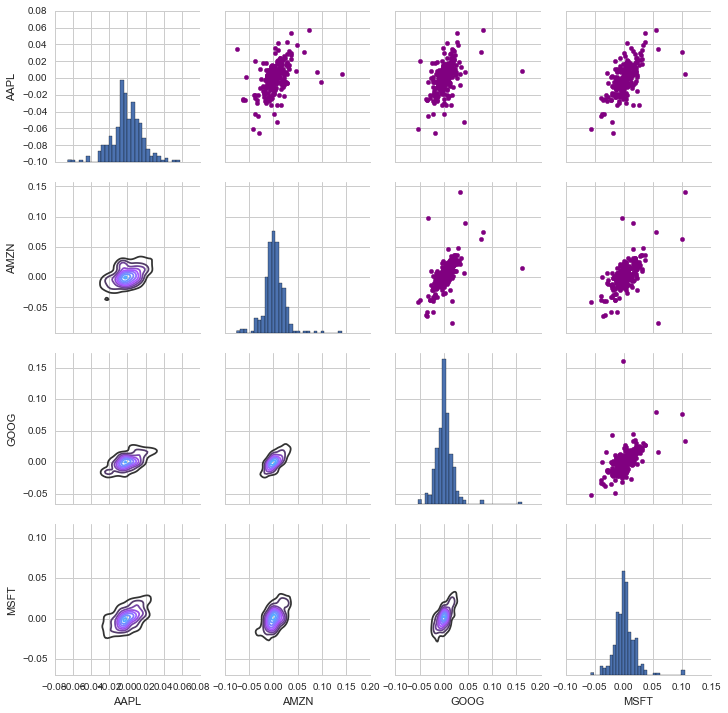

In [77]:
returns_fig=sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color="purple")

returns_fig.map_lower(sns.kdeplot,cmap="cool_d")

returns_fig.map_diag(plt.hist,bins=30)


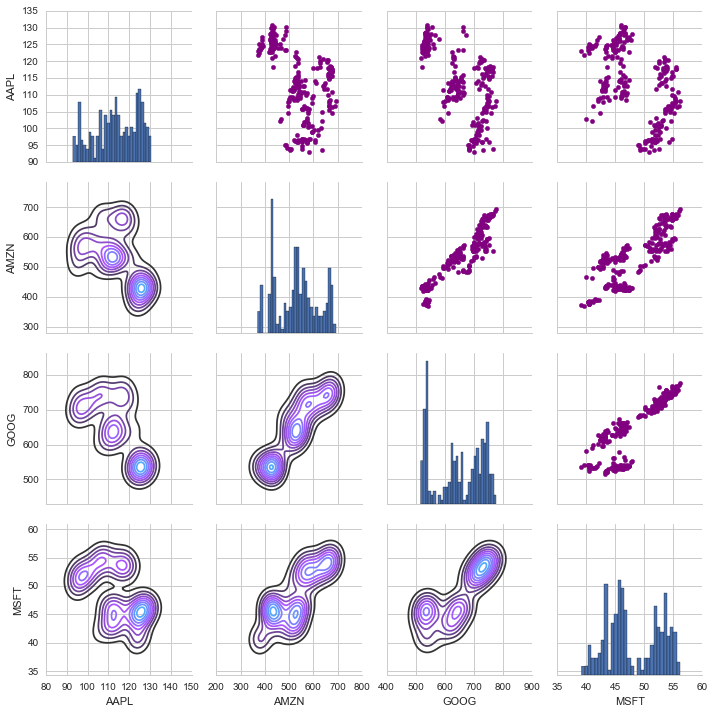

In [78]:
returns_fig=sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color="purple")

returns_fig.map_lower(sns.kdeplot,cmap="cool_d")

returns_fig.map_diag(plt.hist,bins=30)


c:\python3.5\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
c:\python3.5\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


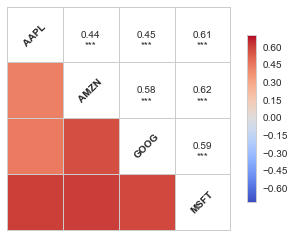

In [79]:
sns.corrplot(tech_rets.dropna(),annot=True)

c:\python3.5\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
c:\python3.5\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


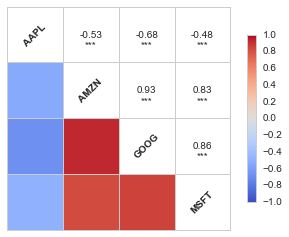

In [80]:
sns.corrplot(closing_df,annot=True)

#Lets start risk analysis

In [81]:
rets=tech_rets.dropna()

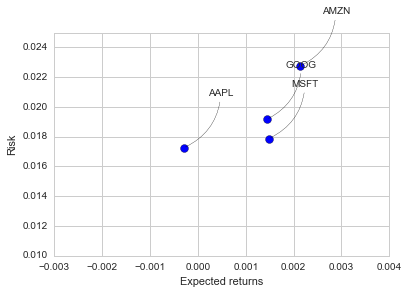

In [82]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

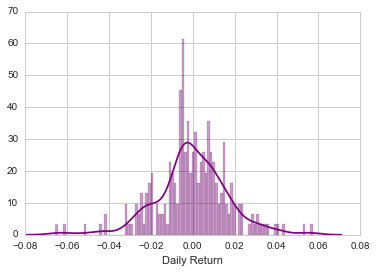

In [83]:
sns.distplot(AAPL["Daily Return"].dropna(),bins=100,color="purple")

In [84]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-02,0.008612,0.005375,-0.012957,-0.010560
2015-04-06,0.016199,0.012868,0.002306,0.031273
2015-04-07,-0.010522,-0.006975,0.000475,-0.000481
2015-04-08,-0.003254,0.018135,0.008547,-0.002649
2015-04-09,0.007643,0.006139,-0.001532,0.001449


In [90]:
rets["AAPL"].quantile(0.05)

-0.026888654484884644

In [91]:
rets["AMZN"].quantile(0.05)

-0.032817780064531343

In [92]:
rets["GOOG"].quantile(0.05)

-0.022812261791539334

In [93]:
rets["MSFT"].quantile(0.05)

-0.021745785853459154

In [94]:
days=35

dt=1/days

mu=rets.mean()["GOOG"]

sigma=rets.std()["GOOG"]




In [102]:
def stock_monty_carlo(start_price,datys,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x]=mu*dt
        
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

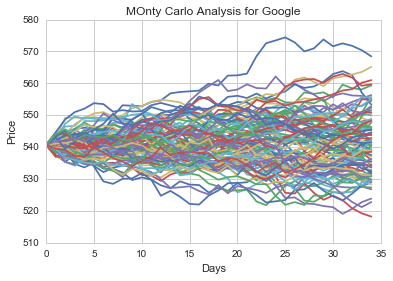

In [105]:
start_price=540.74

for x in range(100):
    plt.plot(stock_monty_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("MOnty Carlo Analysis for Google")

In [110]:
runs=10000

simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monty_carlo(start_price,days,mu,sigma)[days-1]

In [111]:
simulations

array([ 549.83007835,  541.93756289,  542.19507613, ...,  559.58169749,
        558.39447922,  559.87777429])

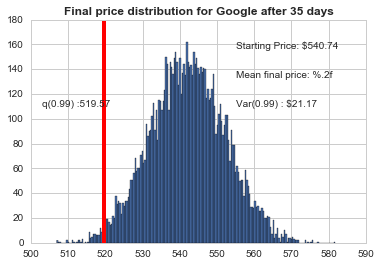

In [114]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#starting price
plt.figtext(0.6,0.8,s="Starting Price: $%.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7,"Mean final price: %%.2f" %simulations.mean())

#Variance of price
plt.figtext(0.6,0.6, "Var(0.99) : $%.2f"%(start_price-q,))

#Display 1% quartile
plt.figtext(0.15,0.6, "q(0.99) :%.2f" %q)

#Plot a line at the 1% quartile result
plt.axvline(x=q, linewidth=4, color="r")

#Title
plt.title(u"Final price distribution for Google after %s days"%days, weight="bold");



